# Modelo Lineal Vs Modelo No Lineal

# **Modelo Lineal**

Un **modelo lineal** es aquel en el que la relación entre las variables independientes y la variable dependiente es **lineal en los parámetros**.

### Forma general:

$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$

- $( y )$: variable dependiente o respuesta  
- $( x_i )$: variables independientes o explicativas  
- $( \beta_i )$: coeficientes (parámetros del modelo)  
- $( \epsilon )$: error aleatorio

### Características:

- Lineal en los **coeficientes**.
- Puede incluir transformaciones no lineales de las **variables**, como $( x^2 )$, $( \log(x) )$, etc., **siempre que los coeficientes estén en forma lineal**.

### Ejemplos:

- $( y = 2 + 3x + \epsilon )$ → modelo lineal simple  
- $( y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon )$ → aún es lineal (en los coeficientes)

---

# **Modelo No Lineal**

Un **modelo no lineal** es aquel donde la relación entre variables y parámetros **no es lineal en los coeficientes**.

### Formas comunes:

- Exponenciales:  
  $
  y = \alpha e^{\beta x} + \epsilon
  $

- Logísticos:  
  $
  y = \frac{L}{1 + e^{-k(x - x_0)}}
  $

- Polinomios con coeficientes no lineales:  
  $
  y = \beta_0 + x^{\beta_1} + \epsilon
  $

- Ecuaciones diferenciales

### Características:

- Los **coeficientes** pueden aparecer en el exponente, en funciones no lineales, o multiplicando variables entre sí.
- Su estimación requiere **métodos numéricos**, no basta con mínimos cuadrados lineales.

### Ejemplos:

- $( y = a \cdot e^{bx} )$  
- $( y = \frac{1}{\beta_0 + \beta_1 x} )$  
- Ecuación logística:  
  $
  y = \frac{K}{1 + e^{-r(t - t_0)}}
  $


In [1]:
# 1. Librerias

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [2]:
# 2. Parametros

m = 80           # masa (kg)
g = 9.81         # gravedad (m/s^2)
k = 40           # constante elástica (N/m)
L0 = 30          # longitud de la cuerda sin estirar (m)
b = 5            # coeficiente de fricción (kg/s)

y0 = 0           # posición inicial (salto desde 0)
v0 = 0           # velocidad inicial (salta desde reposo)

t_span = (0, 30)
t_eval = np.linspace(*t_span, 1000)

In [3]:
# 3. Modelo lineal

def modelo_lineal(t, y):
    pos, vel = y
    dydt = [vel, -g - (k/m)*pos]
    return dydt

sol_lineal = solve_ivp(modelo_lineal, t_span, [y0, v0], t_eval=t_eval)

In [4]:
# 4. Modelo no lineal (cuerda solo estira si se supera L0 + fricción)

def modelo_no_lineal(t, y):
    pos, vel = y
    if pos > L0:
        fuerza_resorte = -k*(pos - L0)
    else:
        fuerza_resorte = 0
    fuerza_roz = -b*vel
    acc = (fuerza_resorte + fuerza_roz - m*g) / m
    return [vel, acc]

sol_no_lineal = solve_ivp(modelo_no_lineal, t_span, [y0, v0], t_eval=t_eval)


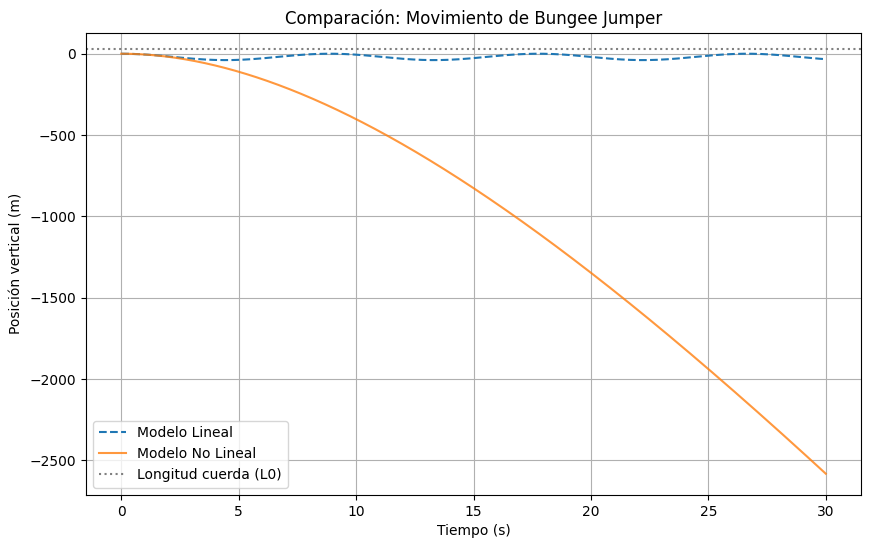

In [5]:
# 5. Grafica Resultante

plt.figure(figsize=(10, 6))
plt.plot(sol_lineal.t, sol_lineal.y[0], label='Modelo Lineal', linestyle='--')
plt.plot(sol_no_lineal.t, sol_no_lineal.y[0], label='Modelo No Lineal', alpha=0.8)
plt.axhline(L0, color='gray', linestyle=':', label='Longitud cuerda (L0)')
plt.title('Comparación: Movimiento de Bungee Jumper')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición vertical (m)')
plt.legend()
plt.grid(True)
plt.show()